<a href="https://colab.research.google.com/github/anjalirawat02/Bometriic-Identification-using-Machine-learning-and-Deep-learning/blob/main/Another_copy_of_anjalimuskan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install keras
!pip install sklearn
import numpy as np
!pip install pandas
import pandas as pd
!pip install tensorflow_decision_forests

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 26.5 MB/s eta 0:00:00


## Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

# Specify the path to the zip file
zip_file_path = '/content/drive/MyDrive/training.zip'

# Specify the extraction directory
extraction_dir = '/content/drive/MyDrive'

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all contents to the extraction directory
    zip_ref.extractall(extraction_dir)

# Now, you can access the contents of the zip file in the specified extraction directory


In [ ]:
import os
training_folder = '/content/drive/MyDrive/traininng'

# List all CSV files in the 'training' folder
csv_files = [file for file in os.listdir(training_folder) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
data_frames = []

# Loop through each CSV file and append its content to the list
for csv_file in csv_files:
    # Construct the full path to the CSV file
    full_path = os.path.join(training_folder, csv_file)

    # Read the CSV file into a DataFrame
    current_data = pd.read_csv(full_path)

    # Append the data frame to the list
    data_frames.append(current_data)

# Concatenate all DataFrames in the list
combined_data = pd.concat(data_frames, ignore_index=True)

In [ ]:
# Display the first few rows of the combined DataFrame
print(combined_data.head())

         n       x       y      lx      ly      rx      ry   xT   yT      zT  \
0   0.0000  0.7334 -4.9397  3.5087 -4.3093 -2.0631 -5.1669  0.0  0.0  0.4433   
1   3.9699  0.7391 -4.9568  3.7095 -4.7536 -2.0802 -5.4778  0.0  0.0  0.4433   
2   7.9582  0.7391 -4.9454  3.5432 -4.3498 -2.0860 -5.4031  0.0  0.0  0.4433   
3  11.9413  0.7506 -4.9511  3.7038 -4.6902 -2.0688 -5.4778  0.0  0.0  0.4433   
4  15.9812  0.7506 -4.9454  3.4626 -4.4529 -2.1319 -5.5126  0.0  0.0  0.4433   

   label  
0    1.0  
1    1.0  
2    1.0  
3    1.0  
4    1.0  


## Data Display

In [ ]:
print(combined_data)


                  n       x       y      lx      ly      rx      ry   xT   yT  \
0            0.0000  0.7334 -4.9397  3.5087 -4.3093 -2.0631 -5.1669  0.0  0.0   
1            3.9699  0.7391 -4.9568  3.7095 -4.7536 -2.0802 -5.4778  0.0  0.0   
2            7.9582  0.7391 -4.9454  3.5432 -4.3498 -2.0860 -5.4031  0.0  0.0   
3           11.9413  0.7506 -4.9511  3.7038 -4.6902 -2.0688 -5.4778  0.0  0.0   
4           15.9812  0.7506 -4.9454  3.4626 -4.4529 -2.1319 -5.5126  0.0  0.0   
...             ...     ...     ...     ...     ...     ...     ...  ...  ...   
1028706  99244.1101 -0.4011 -0.2063  2.9405 -0.0746 -3.7153 -0.3502  0.0  0.0   
1028707  99248.1123 -0.4011 -0.2235  2.9751 -0.2238 -3.7324 -0.3789  0.0  0.0   
1028708  99252.1474 -0.3953 -0.2349  3.0955 -0.4877 -3.6463 -0.3330  0.0  0.0   
1028709  99256.1050 -0.3953 -0.2349  2.9061 -0.3500 -3.6638 -0.3617  0.0  0.0   
1028710  99260.1104 -0.3896 -0.2406  2.9866 -0.1492 -3.6865 -0.6488  0.0  0.0   

             zT  label  
0 

In [ ]:
combined_data.drop(['xT', 'yT', 'zT'], axis = 1, inplace = True)

In [ ]:
print(combined_data)

                  n       x       y      lx      ly      rx      ry  label
0            0.0000  0.7334 -4.9397  3.5087 -4.3093 -2.0631 -5.1669    1.0
1            3.9699  0.7391 -4.9568  3.7095 -4.7536 -2.0802 -5.4778    1.0
2            7.9582  0.7391 -4.9454  3.5432 -4.3498 -2.0860 -5.4031    1.0
3           11.9413  0.7506 -4.9511  3.7038 -4.6902 -2.0688 -5.4778    1.0
4           15.9812  0.7506 -4.9454  3.4626 -4.4529 -2.1319 -5.5126    1.0
...             ...     ...     ...     ...     ...     ...     ...    ...
1028706  99244.1101 -0.4011 -0.2063  2.9405 -0.0746 -3.7153 -0.3502   10.0
1028707  99248.1123 -0.4011 -0.2235  2.9751 -0.2238 -3.7324 -0.3789   10.0
1028708  99252.1474 -0.3953 -0.2349  3.0955 -0.4877 -3.6463 -0.3330   10.0
1028709  99256.1050 -0.3953 -0.2349  2.9061 -0.3500 -3.6638 -0.3617   10.0
1028710  99260.1104 -0.3896 -0.2406  2.9866 -0.1492 -3.6865 -0.6488   10.0

[1028711 rows x 8 columns]


In [ ]:
print(combined_data)


                  n       x       y      lx      ly      rx      ry  label
0            0.0000  0.7334 -4.9397  3.5087 -4.3093 -2.0631 -5.1669    1.0
1            3.9699  0.7391 -4.9568  3.7095 -4.7536 -2.0802 -5.4778    1.0
2            7.9582  0.7391 -4.9454  3.5432 -4.3498 -2.0860 -5.4031    1.0
3           11.9413  0.7506 -4.9511  3.7038 -4.6902 -2.0688 -5.4778    1.0
4           15.9812  0.7506 -4.9454  3.4626 -4.4529 -2.1319 -5.5126    1.0
...             ...     ...     ...     ...     ...     ...     ...    ...
1028706  99244.1101 -0.4011 -0.2063  2.9405 -0.0746 -3.7153 -0.3502   10.0
1028707  99248.1123 -0.4011 -0.2235  2.9751 -0.2238 -3.7324 -0.3789   10.0
1028708  99252.1474 -0.3953 -0.2349  3.0955 -0.4877 -3.6463 -0.3330   10.0
1028709  99256.1050 -0.3953 -0.2349  2.9061 -0.3500 -3.6638 -0.3617   10.0
1028710  99260.1104 -0.3896 -0.2406  2.9866 -0.1492 -3.6865 -0.6488   10.0

[1028711 rows x 8 columns]


## Data Cleaning

In [ ]:
s = combined_data['label'].unique()
s

array([ 1., nan,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [ ]:
rows_with_nan_label = combined_data[combined_data['label'].isna()]

rows_with_nan_label

,n,x,y,lx,ly,rx,ry,label
25032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
27341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
combined_data = combined_data.dropna(subset=['label'])
combined_data

,n,x,y,lx,ly,rx,ry,label
0,0.0000,0.7334,-4.9397,3.5087,-4.3093,-2.0631,-5.1669,1.0
1,3.9699,0.7391,-4.9568,3.7095,-4.7536,-2.0802,-5.4778,1.0
2,7.9582,0.7391,-4.9454,3.5432,-4.3498,-2.0860,-5.4031,1.0
3,11.9413,0.7506,-4.9511,3.7038,-4.6902,-2.0688,-5.4778,1.0
4,15.9812,0.7506,-4.9454,3.4626,-4.4529,-2.1319,-5.5126,1.0
...,...,...,...,...,...,...,...,...
1028706,99244.1101,-0.4011,-0.2063,2.9405,-0.0746,-3.7153,-0.3502,10.0
1028707,99248.1123,-0.4011,-0.2235,2.9751,-0.2238,-3.7324,-0.3789,10.0
1028708,99252.1474,-0.3953,-0.2349,3.0955,-0.4877,-3.6463,-0.3330,10.0
1028709,99256.1050,-0.3953,-0.2349,2.9061,-0.3500,-3.6638,-0.3617,10.0


In [ ]:
combined_data['label']= combined_data['label']-1

<ipython-input-13-7e8fa3285dca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data['label']= combined_data['label']-1


In [ ]:
s = combined_data['label'].unique()
s

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [ ]:
combined_data.shape

(1026397, 8)

In [ ]:
combined_data.columns

Index(['n', 'x', 'y', 'lx', 'ly', 'rx', 'ry', 'label'], dtype='object')

In [ ]:
combined_data.describe()

,n,x,y,lx,ly,rx,ry,label
count,1.021270e+06,1.016332e+06,1.016332e+06,1.014909e+06,1.014909e+06,1.015191e+06,1.015191e+06,1.026397e+06
mean,5.424867e+04,-5.562714e-01,1.696111e-01,2.702479e+00,6.096899e-02,-3.768594e+00,-1.331503e-01,4.481476e+00
std,4.272547e+04,9.282669e+00,4.547674e+00,9.150531e+00,4.410496e+00,9.225659e+00,4.502587e+00,2.891257e+00
min,0.000000e+00,-3.881370e+01,-6.041160e+01,-4.091140e+01,-1.404711e+02,-3.541550e+01,-5.421340e+01,0.000000e+00
25%,2.045996e+04,-8.048200e+00,-6.761000e-01,-5.065600e+00,-9.186000e-01,-1.071350e+01,-1.150900e+00,2.000000e+00
50%,4.177191e+04,-2.860000e-02,-7.450000e-02,4.324300e+00,-1.454000e-01,-4.818600e+00,-3.726000e-01,5.000000e+00
75%,8.122415e+04,5.814000e+00,5.618000e-01,8.655900e+00,6.466000e-01,2.906100e+00,4.147000e-01,7.000000e+00
max,1.661362e+05,4.056420e+01,8.538450e+01,2.592530e+01,8.528560e+01,3.928020e+01,8.360650e+01,9.000000e+00


In [ ]:
combined_data.nunique()

n        1013484
x          73032
y         172147
lx         73388
ly        192376
rx         76670
ry        195251
label         10
dtype: int64

In [ ]:
combined_data = combined_data.dropna(subset=['n','x','y','lx','ly','rx','ry'])

In [ ]:
combined_data.isnull().sum()

n        0
x        0
y        0
lx       0
ly       0
rx       0
ry       0
label    0
dtype: int64

In [ ]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1013768 entries, 0 to 1028710
Data columns (total 8 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   n       1013768 non-null  float64
 1   x       1013768 non-null  float64
 2   y       1013768 non-null  float64
 3   lx      1013768 non-null  float64
 4   ly      1013768 non-null  float64
 5   rx      1013768 non-null  float64
 6   ry      1013768 non-null  float64
 7   label   1013768 non-null  float64
dtypes: float64(8)
memory usage: 69.6 MB


## Data Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
combined_data[[ 'x','y','lx','ly','rx','ry']] = scaler.fit_transform(combined_data[[ 'x','y','lx','ly','rx','ry']])
combined_data

<ipython-input-22-883c0484a087>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data[[ 'x','y','lx','ly','rx','ry']] = scaler.fit_transform(combined_data[[ 'x','y','lx','ly','rx','ry']])


,n,x,y,lx,ly,rx,ry,label
0,0.0000,0.537227,0.334965,0.655709,0.412104,0.446510,0.355874,0.0
1,3.9699,0.537313,0.334833,0.658793,0.409109,0.446281,0.353618,0.0
2,7.9582,0.537313,0.334921,0.656239,0.411831,0.446204,0.354160,0.0
3,11.9413,0.537488,0.334877,0.658705,0.409537,0.446434,0.353618,0.0
4,15.9812,0.537488,0.334921,0.655001,0.411136,0.445589,0.353366,0.0
...,...,...,...,...,...,...,...,...
1028706,99244.1101,0.520014,0.371455,0.646982,0.440641,0.424391,0.390823,9.0
1028707,99248.1123,0.520014,0.371322,0.647513,0.439636,0.424162,0.390615,9.0
1028708,99252.1474,0.520102,0.371234,0.649362,0.437857,0.425315,0.390948,9.0
1028709,99256.1050,0.520102,0.371234,0.646454,0.438785,0.425081,0.390740,9.0


## Feature Selection and Dimensionality Reduction

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import folium
from folium import plugins
from folium.plugins import MarkerCluster,HeatMap,HeatMapWithTime

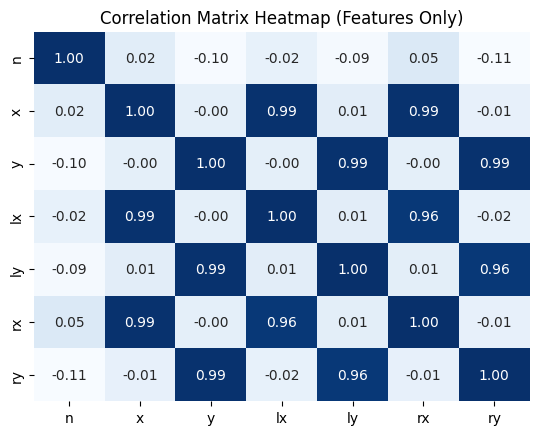

In [ ]:
features_only_df = combined_data.drop(columns=['label'])

# Create a heatmap of the correlation matrix for features only
sns.heatmap(features_only_df.corr(), annot=True, cbar=False, cmap='Blues', fmt='.2f')
plt.title('Correlation Matrix Heatmap (Features Only)')
plt.show()

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
scaler = StandardScaler()
df_standardized = scaler.fit_transform(combined_data)

In [ ]:
pca = PCA()
pca_result = pca.fit_transform(df_standardized)

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([3.72771477e-01, 3.70169077e-01, 1.24803470e-01, 1.23393893e-01,
       4.88873749e-03, 3.66411211e-03, 2.59543367e-04, 4.96895984e-05])

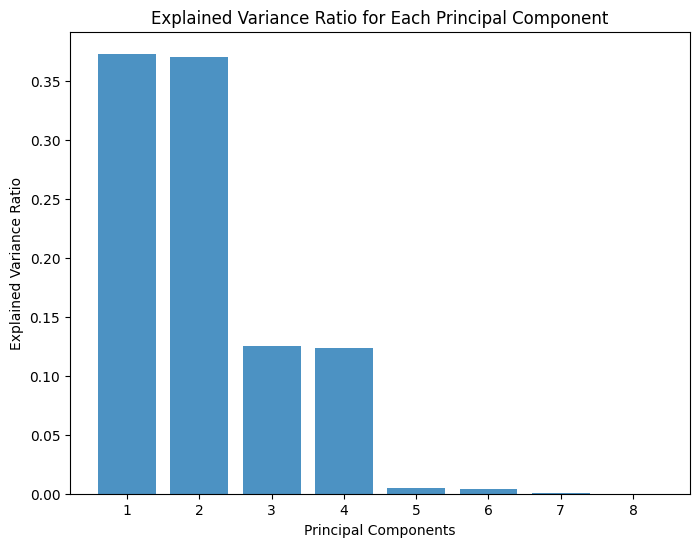

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.8, align='center')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()

In [ ]:
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
cumulative_variance_ratio

array([0.37277148, 0.74294055, 0.86774402, 0.99113792, 0.99602665,
       0.99969077, 0.99995031, 1.        ])

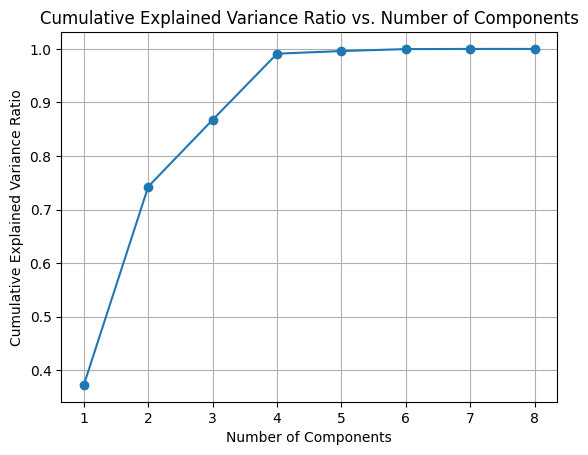

In [ ]:
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()

In [ ]:
# Assuming you want to retain 80% of the variance
threshold = 0.80
n_components = np.argmax(cumulative_variance_ratio >= threshold) + 1

print(f"Number of components to retain 80% of the variance: {n_components}")


Number of components to retain 80% of the variance: 3


## Declaration of input and ouput variables

In [ ]:
x = combined_data.drop(['label'], axis = 1)
x

,n,x,y,lx,ly,rx,ry
0,0.0000,0.537227,0.334965,0.655709,0.412104,0.446510,0.355874
1,3.9699,0.537313,0.334833,0.658793,0.409109,0.446281,0.353618
2,7.9582,0.537313,0.334921,0.656239,0.411831,0.446204,0.354160
3,11.9413,0.537488,0.334877,0.658705,0.409537,0.446434,0.353618
4,15.9812,0.537488,0.334921,0.655001,0.411136,0.445589,0.353366
...,...,...,...,...,...,...,...
1028706,99244.1101,0.520014,0.371455,0.646982,0.440641,0.424391,0.390823
1028707,99248.1123,0.520014,0.371322,0.647513,0.439636,0.424162,0.390615
1028708,99252.1474,0.520102,0.371234,0.649362,0.437857,0.425315,0.390948
1028709,99256.1050,0.520102,0.371234,0.646454,0.438785,0.425081,0.390740


In [ ]:
y = combined_data['label']
y

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1028706    9.0
1028707    9.0
1028708    9.0
1028709    9.0
1028710    9.0
Name: label, Length: 1013768, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib as mpl
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
import tensorflow as tf


In [ ]:
# Assuming n_components is the number of components to retain
n_components = 3

# Project data onto selected principal components
selected_pcs = pca_result[:, :n_components]

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(selected_pcs, y, test_size=0.2, random_state=42)

## Random Forest Classifier

In [ ]:
# Fit a machine learning model using the reduced-dimensional data
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


KeyboardInterrupt: 

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([9., 5., 3., ..., 0., 0., 4.])

In [ ]:
y_test

971893    9.0
544815    5.0
298016    3.0
694743    6.0
168686    1.0
         ... 
726344    7.0
966887    9.0
17972     0.0
39060     0.0
436970    4.0
Name: label, Length: 202754, dtype: float64

## CNN Model

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3,), dtype='float32'),
    tf.keras.layers.Dense(units=1024, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              4096      
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 64)                65600     
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 70346 (274.79 KB)
Trainable params: 70346 (274.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#import tensorflow as tf

#model = tf.keras.Sequential([
#    tf.keras.layers.Input(shape=(7,), dtype='float32'),
#   tf.keras.layers.Dense(units=1024, activation='relu'),
#   tf.keras.layers.Dropout(0.4),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(64, activation='relu'),
#   tf.keras.layers.Dense(10, activation='softmax')
#])

#model.compile(
#   optimizer='adam',
#   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
#   metrics=['accuracy']
#)

#model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1024)              8192      
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 flatten_2 (Flatten)         (None, 1024)              0         
                                                                 
 dense_7 (Dense)             (None, 64)                65600     
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 74442 (290.79 KB)
Trainable params: 74442 (290.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=512, validation_split=0.2)

# Evaluate the model on the test set
_, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy:.4f}')

Epoch 1/100
1268/1268 [==============================] - 26s 20ms/step - loss: 0.9515 - accuracy: 0.5769 - val_loss: 0.7703 - val_accuracy: 0.6579
Epoch 2/100
1268/1268 [==============================] - 23s 18ms/step - loss: 0.7600 - accuracy: 0.6632 - val_loss: 0.6982 - val_accuracy: 0.6891
Epoch 3/100
1268/1268 [==============================] - 23s 18ms/step - loss: 0.7132 - accuracy: 0.6832 - val_loss: 0.6677 - val_accuracy: 0.7061
Epoch 4/100
1268/1268 [==============================] - 22s 17ms/step - loss: 0.6914 - accuracy: 0.6919 - val_loss: 0.6519 - val_accuracy: 0.7127
Epoch 5/100
1268/1268 [==============================] - 23s 18ms/step - loss: 0.6762 - accuracy: 0.6989 - val_loss: 0.6357 - val_accuracy: 0.7194
Epoch 6/100
1268/1268 [==============================] - 21s 17ms/step - loss: 0.6643 - accuracy: 0.7043 - val_loss: 0.6264 - val_accuracy: 0.7174
Epoch 7/100
1268/1268 [==============================] - 23s 18ms/step - loss: 0.6539 - accuracy: 0.7086 - val_loss: 0

## Other Classifiers

In [ ]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.datasets import make_classification
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_validate

# Using Random Forest Classifier as it have highest accuracy

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

## Model Evaluation

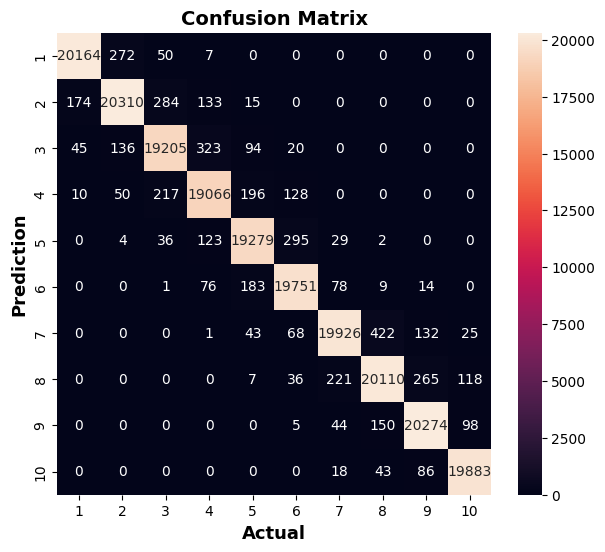

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_pred contains the predicted class labels and y_test contains the true class labels

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(7, 6))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt='g')  # Adjust the colormap if needed

# Adjust tick labels
tick_labels = [str(i) for i in range(1, 11)]
plt.xticks(ticks=np.arange(10) + 0.5, labels=tick_labels)
plt.yticks(ticks=np.arange(10) + 0.5, labels=tick_labels)

plt.ylabel('Prediction',weight='bold',fontsize=13)  # Adjust label fontsize if needed
plt.xlabel('Actual',weight='bold',fontsize=13)  # Adjust label fontsize if needed
plt.title('Confusion Matrix',weight='bold',fontsize=14) # Adjust title fontsize if needed
plt.show()



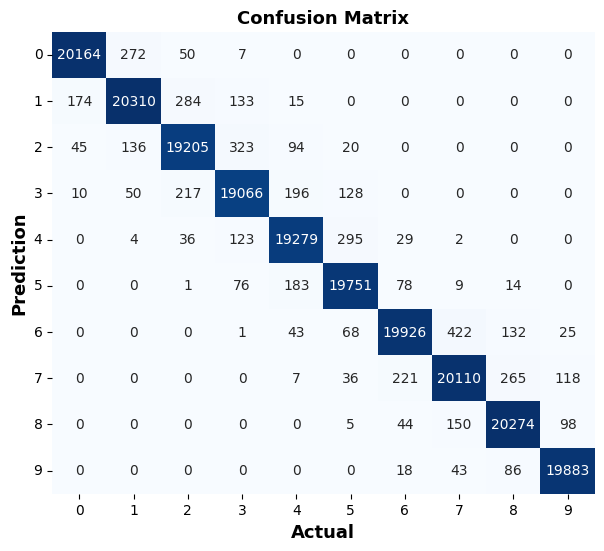

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)

plt.ylabel('Prediction', weight='bold', fontsize=13)
plt.xlabel('Actual', weight='bold', fontsize=13)
plt.title('Confusion Matrix', weight='bold', fontsize=13)

plt.xticks(rotation=0)  # Set rotation angle to 0 for x-axis labels
plt.yticks(rotation=0)  # Keep y-axis labels horizontal

plt.show()



In [ ]:
class_labels = [ 1, 2, 3, 4, 5, 6, 7, 8, 9,10]

tp = np.diag(cm)
fp = np.sum(cm, axis=0) - tp
fn = np.sum(cm, axis=1) - tp
tn = np.sum(cm) - (tp + fp + fn)

# Display results for each class
for i, label in enumerate(class_labels):
    print(f"Class {label}:")
    print(f"True Positive (TP): {tp[i]}")
    print(f"True Negative (TN): {tn[i]}")
    print(f"False Positive (FP): {fp[i]}")
    print(f"False Negative (FN): {fn[i]}\n")

Class 1:
True Positive (TP): 20177
True Negative (TN): 182074
False Positive (FP): 196
False Negative (FN): 307

Class 2:
True Positive (TP): 20130
True Negative (TN): 181612
False Positive (FP): 450
False Negative (FN): 562

Class 3:
True Positive (TP): 19480
True Negative (TN): 182045
False Positive (FP): 570
False Negative (FN): 659

Class 4:
True Positive (TP): 18982
True Negative (TN): 182483
False Positive (FP): 687
False Negative (FN): 602

Class 5:
True Positive (TP): 19279
True Negative (TN): 182395
False Positive (FP): 588
False Negative (FN): 492

Class 6:
True Positive (TP): 19718
True Negative (TN): 182080
False Positive (FP): 565
False Negative (FN): 391

Class 7:
True Positive (TP): 19938
True Negative (TN): 181708
False Positive (FP): 429
False Negative (FN): 679

Class 8:
True Positive (TP): 20241
True Negative (TN): 181244
False Positive (FP): 614
False Negative (FN): 655

Class 9:
True Positive (TP): 20114
True Negative (TN): 181865
False Positive (FP): 457
False Neg

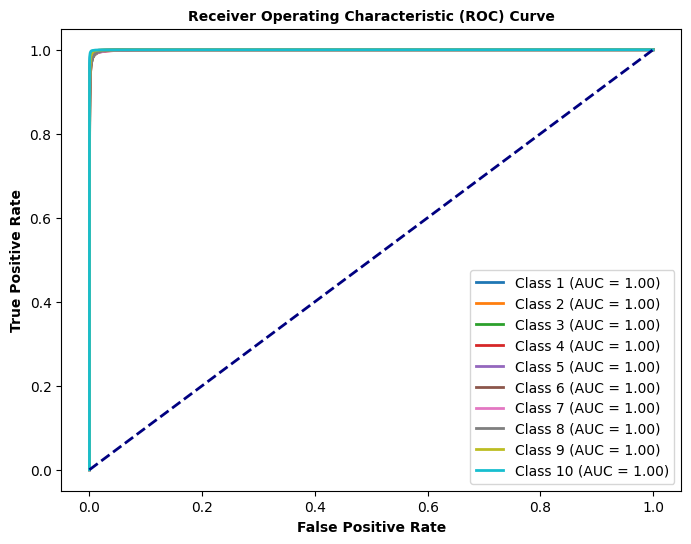

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_pred contains the predicted class labels and y_test contains the true class labels

# Compute the one-hot encoded binary labels for y_test
y_test_bin = label_binarize(y_test, classes=np.arange(10))  # Adjust the range for 10 classes

# Compute the predicted probabilities for each class
y_probs = rf.predict_proba(X_test)

# Initialize dictionaries to store false positive rate, true positive rate, and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and AUC for each class
for i in range(10):  # Adjust the range for 10 classes
    # Compute ROC curve and AUC only if there are positive samples for the current class
    if np.sum(y_test_bin[:, i]) > 0:
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(10):  # Adjust the range for 10 classes
    if i in roc_auc:
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i+1} (AUC = {roc_auc[i]:.2f})')  # Adjust label index

# Plot the diagonal line representing random guessing
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set labels and title
plt.xlabel('False Positive Rate', weight='bold', fontsize=10)
plt.ylabel('True Positive Rate', weight='bold', fontsize=10)
plt.title('Receiver Operating Characteristic (ROC) Curve', weight='bold', fontsize=10)
plt.legend(loc='lower right')
plt.show()


## Random Forest

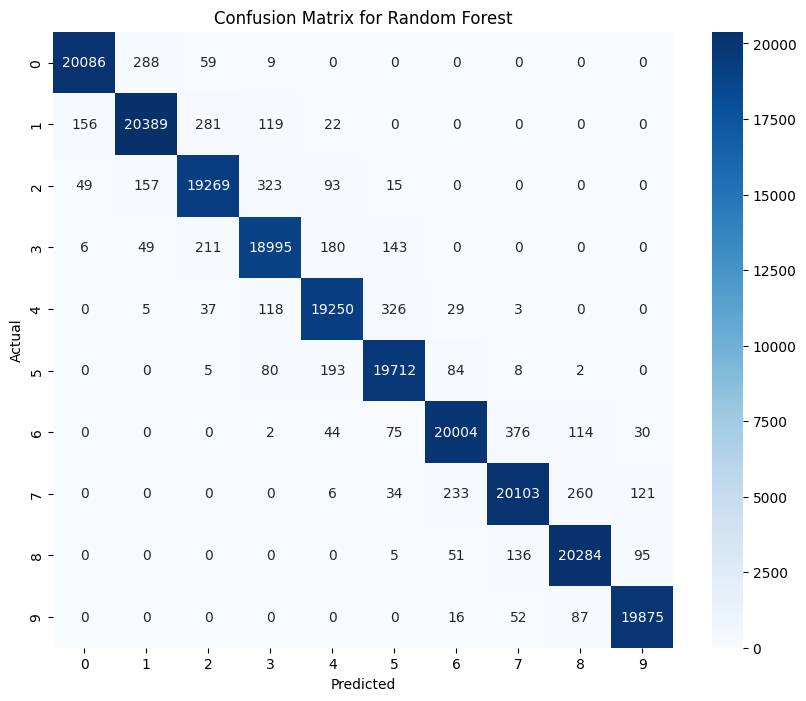

Accuracy: 0.976390108209949
F1 Score: 0.9763862041052569
Precision: 0.9764037979636743
Recall: 0.976390108209949
Specificity for each class: [0.9988426433805784, 0.9972550292375142, 0.9967568690934546, 0.9964459245509636, 0.9970598843627382, 0.9967263371106366, 0.9977321274621244, 0.996840607262757, 0.9974585993204634, 0.9986537072305772]


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred)
score_rf = f1_score(y_test, y_pred, average='weighted')
precision_rf = precision_score(y_test, y_pred, average='weighted')
recall_rf = recall_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred)

# Calculate specificity for each class
specificity_rf = []
for i in range(10):
    tn_rf = np.sum(np.delete(np.delete(cm_rf, i, axis=0), i, axis=1))
    fp_rf = np.sum(cm_rf[:, i]) - cm_rf[i, i]
    specificity_rf.append(tn_rf / (tn_rf + fp_rf))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest")
plt.show()

print("Accuracy:", accuracy_rf)
print("F1 Score:", score_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("Specificity for each class:", specificity_rf)


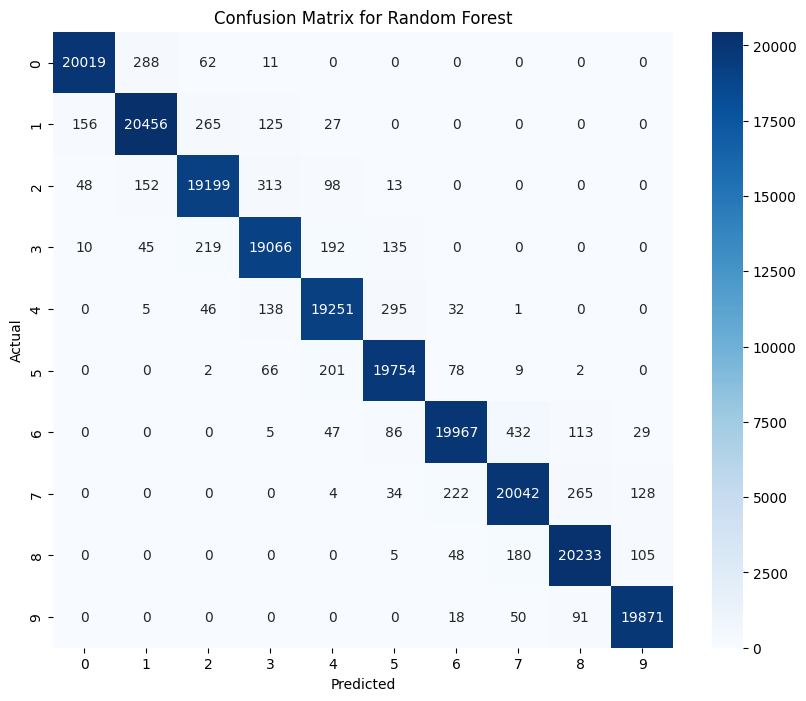

Accuracy: 0.9758525109245687
F1 Score: 0.9758494399672715
Precision: 0.9758708234349098
Recall: 0.9758525109245687
Specificity for each class: [0.9988265871231645, 0.9973036181042785, 0.996752874034472, 0.9964060801695369, 0.9968904724951636, 0.9968900909976894, 0.9978140876012632, 0.9963088888766828, 0.9974146874296723, 0.9985661434732165]
Equal Error Rate (EER) for each class: [0.009443428715159647, 0.014972233936115093, 0.01736285572351969, 0.01707636195926472, 0.014631453351770705, 0.010455113610144935, 0.018308488865358023, 0.017622313232593587, 0.009508105218127706, 0.004685974693746232]
Overall Equal Error Rate (EER) for the model: 0.013406632930580035
False Acceptance Rate (FAR) for each class: [0.33372447095894514, 0.3342321272985738, 0.334415708655176, 0.33453130661015434, 0.33436984250161217, 0.3343699696674369, 0.33406197079957894, 0.3345637037077724, 0.3341951041901092, 0.33381128550892786]
False Rejection Rate (FRR) for each class: [0.33923781485116133, 0.3424160286588362

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred)
score_rf = f1_score(y_test, y_pred, average='weighted')
precision_rf = precision_score(y_test, y_pred, average='weighted')
recall_rf = recall_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred)

# Calculate specificity for each class
specificity_rf = []
for i in range(10):
    tn_rf = np.sum(np.delete(np.delete(cm_rf, i, axis=0), i, axis=1))
    fp_rf = np.sum(cm_rf[:, i]) - cm_rf[i, i]
    specificity_rf.append(tn_rf / (tn_rf + fp_rf))

# Calculate false positive rate (FPR) and true positive rate (TPR) for each class
fpr_rf = []
tpr_rf = []
for i in range(10):
    fpr_temp, tpr_temp, _ = roc_curve((y_test == i), (y_pred == i))
    fpr_rf.append(fpr_temp)
    tpr_rf.append(tpr_temp)

# Calculate EER for each class
eer_rf = []
for i in range(10):
    eer_index = np.argmin(np.abs(fpr_rf[i] - (1 - tpr_rf[i])))
    eer_rf.append((fpr_rf[i][eer_index] + (1 - tpr_rf[i][eer_index])) / 2)

# Calculate False Acceptance Rate (FAR) for each class
FAR_rf = []
for i in range(10):
    FAR_rf.append(np.mean(fpr_rf[i]))

# Calculate False Rejection Rate (FRR) for each class
FRR_rf = []
for i in range(10):
    FRR_rf.append(1 - np.mean(tpr_rf[i]))

# Calculate True Positive Proportion (TPP) for each class
TPP_rf = []
for i in range(10):
    TPP_rf.append(np.mean(tpr_rf[i]))

# Calculate True Negative Proportion (TNP) for each class
TNP_rf = []
for i in range(10):
    TNP_rf.append(1 - np.mean(fpr_rf[i]))

# Calculate Effective Error Rate (EER) for the model
overall_eer_rf = np.mean(eer_rf)

# Calculate Identification Rate for each class (TPR)
Identification_Rate_rf = []
for i in range(10):
    tp_rf = cm_rf[i, i]
    fn_rf = np.sum(cm_rf[i]) - tp_rf
    Identification_Rate_rf.append(tp_rf / (tp_rf + fn_rf))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest")
plt.show()

print("Accuracy:", accuracy_rf)
print("F1 Score:", score_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("Specificity for each class:", specificity_rf)
print("Equal Error Rate (EER) for each class:", eer_rf)
print("Overall Equal Error Rate (EER) for the model:", overall_eer_rf)
print("False Acceptance Rate (FAR) for each class:", FAR_rf)
print("False Rejection Rate (FRR) for each class:", FRR_rf)
print("True Positive Proportion (TPP) for each class:", TPP_rf)
print("True Negative Proportion (TNP) for each class:", TNP_rf)
print("Identification Rate for each class:", Identification_Rate_rf)


In [ ]:
# Calculate overall False Acceptance Rate (FAR)
overall_FAR_rf = np.mean(FAR_rf)

# Calculate overall False Rejection Rate (FRR)
overall_FRR_rf = np.mean(FRR_rf)

# Calculate overall True Positive Proportion (TPP)
overall_TPP_rf = np.mean(TPP_rf)

# Calculate overall True Negative Proportion (TNP)
overall_TNP_rf = np.mean(TNP_rf)

# Calculate Effective Error Rate (EER) for the model
overall_eer_rf = np.mean(eer_rf)
# Calculate overall Identification Rate
overall_Identification_Rate_rf = np.mean(Identification_Rate_rf)

print("Overall Identification Rate for the model:", overall_Identification_Rate_rf)


print("Overall False Acceptance Rate (FAR):", overall_FAR_rf)
print("Overall False Rejection Rate (FRR):", overall_FRR_rf)
print("Overall True Positive Proportion (TPP):", overall_TPP_rf)
print("Overall True Negative Proportion (TNP):", overall_TNP_rf)
print("Overall Effective Error Rate (EER) for the model:", overall_eer_rf)


Overall Identification Rate for the model: 0.975869381108326
Overall False Acceptance Rate (FAR): 0.33422754898982865
Overall False Rejection Rate (FRR): 0.3413768729638913
Overall True Positive Proportion (TPP): 0.6586231270361086
Overall True Negative Proportion (TNP): 0.6657724510101714
Overall Effective Error Rate (EER) for the model: 0.013406632930580035


In [ ]:
overall_specificity_rf = np.mean(specificity_rf)

# Print overall specificity
print("Overall Specificity:", overall_specificity_rf)

Overall Specificity: 0.9973771729011809


## Gradient Boost

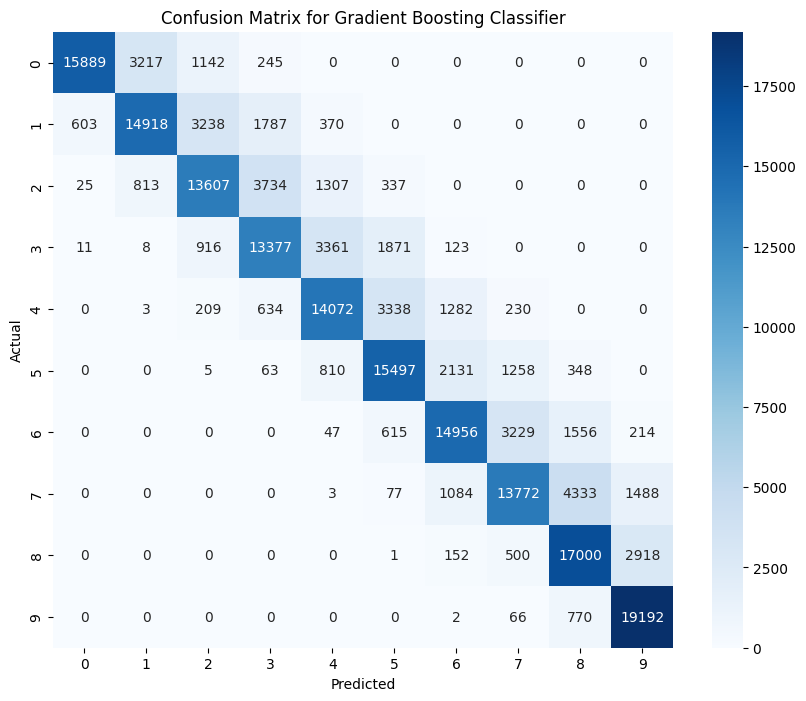

Accuracy: 0.7510579322726062
F1 Score: 0.750568315335878
Precision: 0.7552916946742362
Recall: 0.7510579322726062
Specificity for each class: [0.9964940387685791, 0.9777769223154676, 0.9698793534174087, 0.9646998421515455, 0.9677680259691999, 0.9658402777017334, 0.9737889610567869, 0.9709720489898185, 0.9615386726533212, 0.9747159650620608]
Overall Specificity: 0.972347410808592


In [ ]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred)
score_gb = f1_score(y_test, y_pred, average='weighted')
precision_gb = precision_score(y_test, y_pred, average='weighted')
recall_gb = recall_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
cm_gb = confusion_matrix(y_test, y_pred)

# Calculate specificity for each class
specificity_gb = []
for i in range(10):
    tn_gb = np.sum(np.delete(np.delete(cm_gb, i, axis=0), i, axis=1))
    fp_gb = np.sum(cm_gb[:, i]) - cm_gb[i, i]
    specificity_gb.append(tn_gb / (tn_gb + fp_gb))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Gradient Boosting Classifier")
plt.show()

print("Accuracy:", accuracy_gb)
print("F1 Score:", score_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("Specificity for each class:", specificity_gb)
overall_specificity_gb = np.mean(specificity_gb)

# Print overall specificity
print("Overall Specificity:", overall_specificity_gb)

## Decision Tree

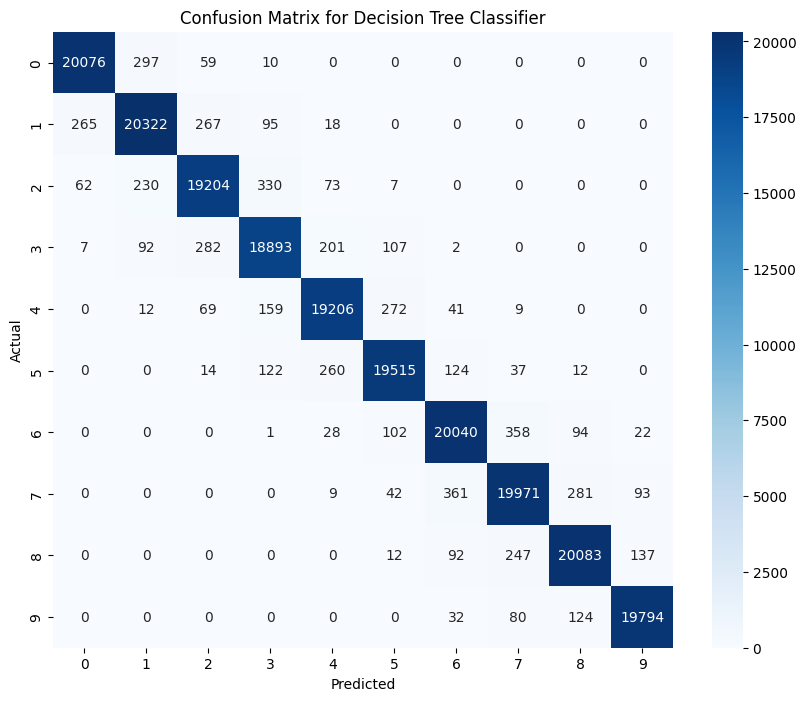

Accuracy: 0.9721337186935892
F1 Score: 0.9721331823592159
Precision: 0.9721337570855819
Recall: 0.9721337186935892
Specificity for each class: [0.9981679757777875, 0.9965289047071573, 0.9962209047952397, 0.9960856035376973, 0.9967811745160832, 0.9970329008594734, 0.9964197266472278, 0.9959834502766529, 0.9971951279757167, 0.9986208708215669]
Overall Specificity: 0.9969036639914602


In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred)
score_dt = f1_score(y_test, y_pred, average='weighted')
precision_dt = precision_score(y_test, y_pred, average='weighted')
recall_dt = recall_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
cm_dt = confusion_matrix(y_test, y_pred)

# Calculate specificity for each class
specificity_dt = []
for i in range(10):
    tn_dt = np.sum(np.delete(np.delete(cm_dt, i, axis=0), i, axis=1))
    fp_dt = np.sum(cm_dt[:, i]) - cm_dt[i, i]
    specificity_dt.append(tn_dt / (tn_dt + fp_dt))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

print("Accuracy:", accuracy_dt)
print("F1 Score:", score_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("Specificity for each class:", specificity_dt)
overall_specificity_dt = np.mean(specificity_dt)

# Print overall specificity
print("Overall Specificity:", overall_specificity_dt)


## XGBoost

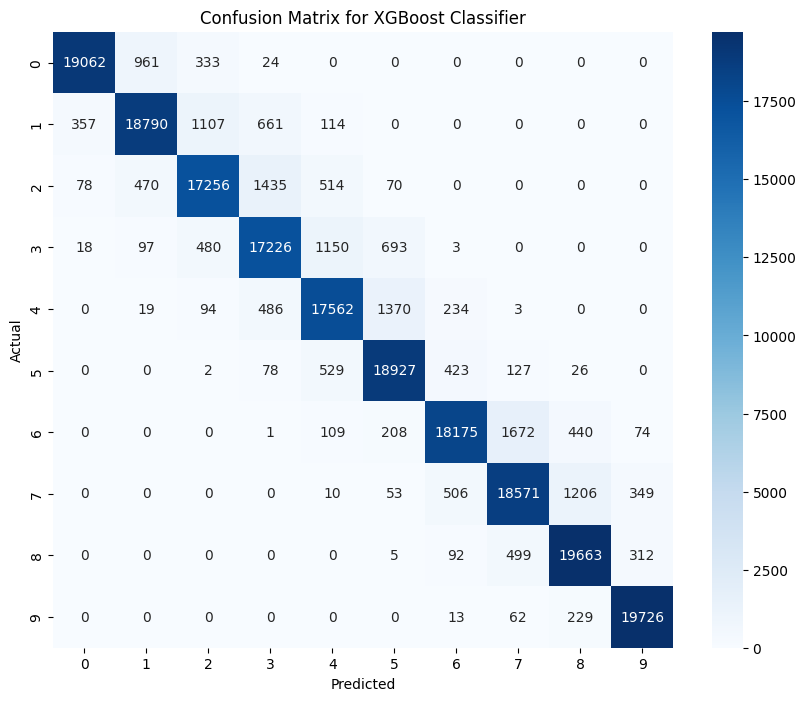

Accuracy: 0.9122286120125866
F1 Score: 0.912186508115407
Precision: 0.9127969026512798
Recall: 0.9122286120125866
Specificity for each class: [0.9975160933027735, 0.9914871371577934, 0.9889794512685111, 0.9853348408133838, 0.9867421551375515, 0.9868650146187624, 0.9930193601537828, 0.9870206910946452, 0.9895654369507583, 0.9959775398962369]
Overall Specificity: 0.9902507720394198


In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_xg = accuracy_score(y_test, y_pred)
score_xg = f1_score(y_test, y_pred, average='weighted')
precision_xg = precision_score(y_test, y_pred, average='weighted')
recall_xg = recall_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
cm_xg = confusion_matrix(y_test, y_pred)

# Calculate specificity for each class
specificity_xg = []
for i in range(10):
    tn_xg = np.sum(np.delete(np.delete(cm_xg, i, axis=0), i, axis=1))
    fp_xg = np.sum(cm_xg[:, i]) - cm_xg[i, i]
    specificity_xg.append(tn_xg / (tn_xg + fp_xg))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_xg, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for XGBoost Classifier")
plt.show()

print("Accuracy:", accuracy_xg)
print("F1 Score:", score_xg)
print("Precision:", precision_xg)
print("Recall:", recall_xg)
print("Specificity for each class:", specificity_xg)
overall_specificity_xg = np.mean(specificity_xg)

# Print overall specificity
print("Overall Specificity:", overall_specificity_xg)

## K-Nearest Neighbors

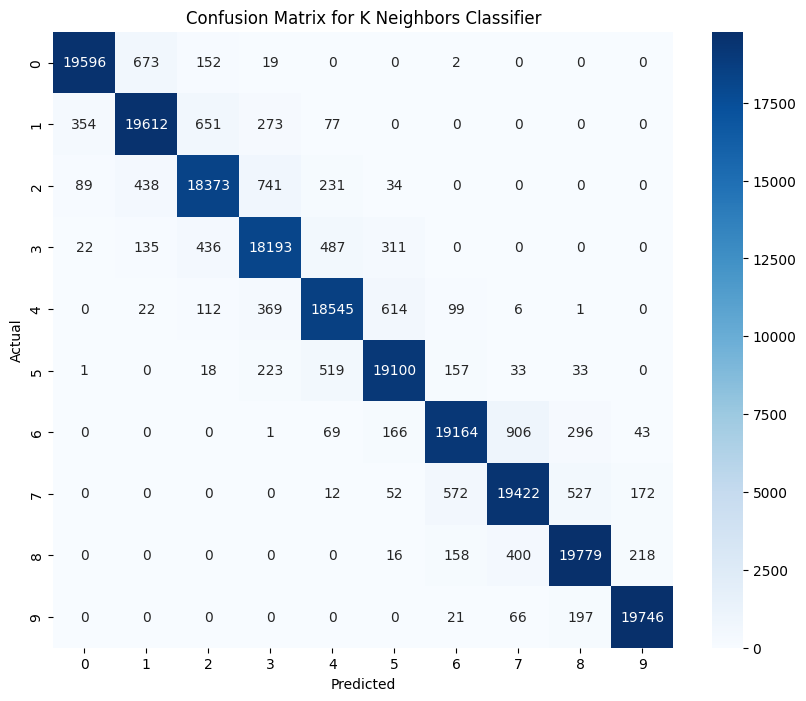

Accuracy: 0.9446422758613887
F1 Score: 0.9446457264749093
Precision: 0.9447217279401946
Recall: 0.9446422758613887
Specificity for each class: [0.9974439422528413, 0.9930248037538438, 0.9925129068953448, 0.9911230004913468, 0.9923764659591444, 0.9934690972792467, 0.994459362250081, 0.9922471249526091, 0.9942146083882689, 0.9976303058164225]
Overall Specificity: 0.9938501618039149


In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_kn = accuracy_score(y_test, y_pred)
score_kn = f1_score(y_test, y_pred, average='weighted')
precision_kn = precision_score(y_test, y_pred, average='weighted')
recall_kn = recall_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
cm_kn = confusion_matrix(y_test, y_pred)

# Calculate specificity for each class
specificity_kn = []
for i in range(10):
    tn_kn = np.sum(np.delete(np.delete(cm_kn, i, axis=0), i, axis=1))
    fp_kn = np.sum(cm_kn[:, i]) - cm_kn[i, i]
    specificity_kn.append(tn_kn / (tn_kn + fp_kn))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_kn, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for K Neighbors Classifier")
plt.show()

print("Accuracy:", accuracy_kn)
print("F1 Score:", score_kn)
print("Precision:", precision_kn)
print("Recall:", recall_kn)
print("Specificity for each class:", specificity_kn)
overall_specificity_kn = np.mean(specificity_kn)

# Print overall specificity
print("Overall Specificity:", overall_specificity_kn)

## Multi-Layer Perceptron

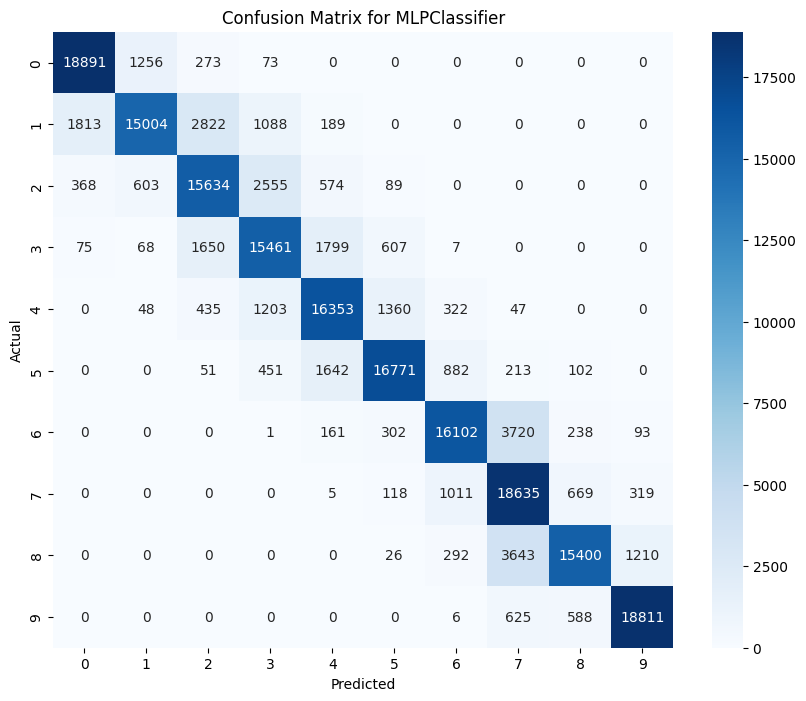

Accuracy: 0.8239640155064758
F1 Score: 0.824401237302609
Precision: 0.8317154171856811
Recall: 0.8239640155064758
Specificity for each class: [0.987622146262777, 0.9891386838834567, 0.9714045186436416, 0.9706642197425268, 0.9761183915709398, 0.9863010698524983, 0.9861642609683919, 0.9546805716577745, 0.9912340888008212, 0.991123224097546]
Overall Specificity: 0.9804451175480373


In [ ]:
# Define and train the model
model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42, batch_size=256)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy_ml = accuracy_score(y_test, y_pred)
score_ml = f1_score(y_test, y_pred, average='weighted')
precision_ml = precision_score(y_test, y_pred, average='weighted')
recall_ml = recall_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
cm_ml = confusion_matrix(y_test, y_pred)

# Calculate specificity for each class
specificity_ml = []
for i in range(10):
    tn_ml = np.sum(np.delete(np.delete(cm_ml, i, axis=0), i, axis=1))
    fp_ml = np.sum(cm_ml[:, i]) - cm_ml[i, i]
    specificity_ml.append(tn_ml / (tn_ml + fp_ml))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_ml, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for MLPClassifier")
plt.show()

# Print results
print("Accuracy:", accuracy_ml)
print("F1 Score:", score_ml)
print("Precision:", precision_ml)
print("Recall:", recall_ml)
print("Specificity for each class:", specificity_ml)
overall_specificity_ml = np.mean(specificity_ml)

# Print overall specificity
print("Overall Specificity:", overall_specificity_ml)

## Linear Discriminant Analysis

In [ ]:
accuracy_cnn=0.82
score_cnn =0.82

## Accuracy Comparison Of All Models

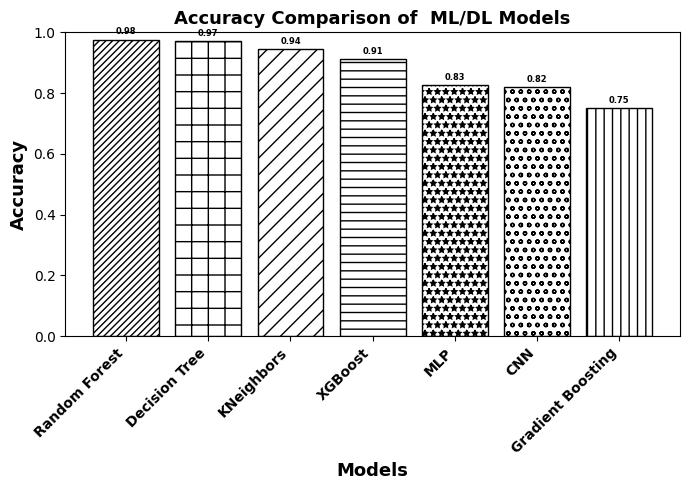

In [ ]:
import matplotlib.pyplot as plt

# Define models and their corresponding accuracies
models = ['Random Forest', 'Gradient Boosting', 'Decision Tree', 'XGBoost', 'KNeighbors', 'MLP', 'CNN']
accuracies = [0.9763753119543881, 0.7504808783057301,0.9716503743452657, 0.9112175345492567, 0.9449924539096639,  0.8258727324738353,0.82]

# Sort the accuracies and corresponding models
sorted_accuracies, sorted_models = zip(*sorted(zip(accuracies, models), reverse=True))

# Define patterns for each model
patterns = ['/////', '+', '//', '--', '**', 'oo', '||']

# Plotting the bar graph
plt.figure(figsize=(7, 5))
bars = plt.bar(sorted_models, sorted_accuracies, color='white')  # Remove color from bars

# Adding patterns and boundaries to each bar
for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)
    bar.set_edgecolor('black')  # Add boundary around the bar

# Adding labels and title
plt.xlabel('Models', weight='bold', fontsize=13)
plt.ylabel('Accuracy', weight='bold', fontsize=13)
plt.title('Accuracy Comparison of  ML/DL Models', weight='bold', fontsize=13)
plt.xticks(rotation=45, ha='right',weight='bold')
plt.ylim(0, 1)  # Limiting y-axis to 0-1 for accuracy

# Adding accuracy values above the bars
for i, v in enumerate(sorted_accuracies):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom', weight='bold',fontsize=6)  # Adjust text position

# Displaying the plot
plt.tight_layout()
plt.show()





In [ ]:
import matplotlib.pyplot as plt

# Define models and their corresponding accuracies
models = ['Random Forest', 'Gradient Boosting', 'Decision Tree', 'XGBoost', 'KNeighbors', 'MLP', 'CNN']
accuracies = [accuracy_rf, accuracy_gb, accuracy_dt, accuracy_xg, accuracy_kn, accuracy_ml, accuracy_cnn]

# Sort the accuracies and corresponding models
sorted_accuracies, sorted_models = zip(*sorted(zip(accuracies, models), reverse=True))

# Define patterns for each model
patterns = ['//', '++', '//', '--', '**', 'oo', '||']

# Plotting the bar graph
plt.figure(figsize=(7, 5))
bars = plt.bar(sorted_models, sorted_accuracies, color='white')  # Remove color from bars

# Adding patterns and boundaries to each bar
for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)
    bar.set_edgecolor('black')  # Add boundary around the bar

# Adding labels and title
plt.xlabel('Models', weight='bold', fontsize=13)
plt.ylabel('Accuracy', weight='bold', fontsize=13)
plt.title('Accuracy Comparison of  ML/DL Models', weight='bold', fontsize=13)
plt.xticks(rotation=45, ha='right',weight='bold')
plt.ylim(0, 1)  # Limiting y-axis to 0-1 for accuracy

# Adding accuracy values above the bars
for i, v in enumerate(sorted_accuracies):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom', weight='bold',fontsize=6)  # Adjust text position

# Displaying the plot
plt.tight_layout()
plt.show()


NameError: name 'accuracy_gb' is not defined

## F1 Score Comparision Of All Models

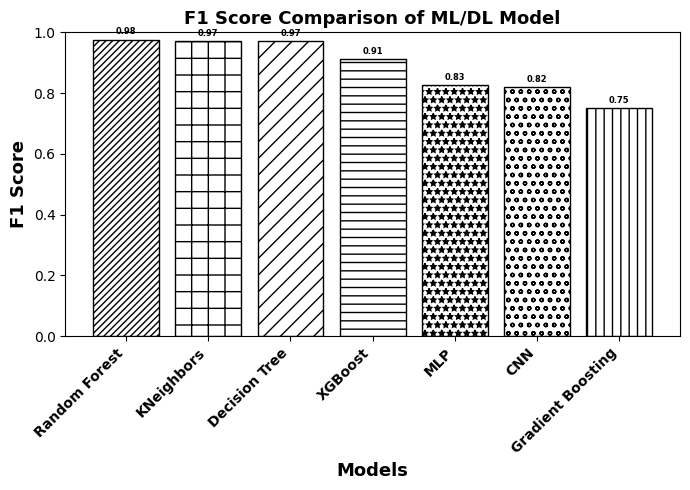

In [ ]:
import matplotlib.pyplot as plt

# Define models and their corresponding F1 scores
models = ['Random Forest', 'Gradient Boosting', 'Decision Tree', 'XGBoost', 'KNeighbors', 'MLP', 'CNN']
f1_scores = [0.9763693274741858, 0.7504808783057301, 0.9716492036223123,0.9111517832292506, 0.9716492036223123, 0.8256820578061674, 0.82]

# Sort the F1 scores and corresponding models
sorted_f1_scores, sorted_models = zip(*sorted(zip(f1_scores, models), reverse=True))

# Define patterns for each model
patterns = ['/////', '+', '//', '--', '**', 'oo', '||']

# Plotting the bar graph
plt.figure(figsize=(7, 5))
bars = plt.bar(sorted_models, sorted_f1_scores, color='white')  # Remove color from bars

# Adding patterns and boundaries to each bar
for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)
    bar.set_edgecolor('black')  # Add boundary around the bar

# Adding labels and title
plt.xlabel('Models', weight='bold', fontsize=13)
plt.ylabel('F1 Score', weight='bold', fontsize=13)
plt.title('F1 Score Comparison of ML/DL Model', weight='bold', fontsize=13)
plt.xticks(rotation=45, ha='right',weight='bold')
plt.ylim(0, 1)  # Limiting y-axis to 0-1 for F1 score

# Adding F1 score values above the bars
for i, v in enumerate(sorted_f1_scores):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom', weight='bold', fontsize=6)  # Adjust text position

# Displaying the plot
plt.tight_layout()
plt.show()



In [ ]:
import matplotlib.pyplot as plt

# Define models and their corresponding F1 scores
models = ['Random Forest', 'Gradient Boosting', 'Decision Tree', 'XGBoost', 'KNeighbors', 'MLP', 'CNN']
f1_scores = [score_rf, score_gb, score_dt, score_xg, score_kn, score_ml, score_cnn]

# Sort the F1 scores and corresponding models
sorted_f1_scores, sorted_models = zip(*sorted(zip(f1_scores, models), reverse=True))

# Define patterns for each model
patterns = ['/////', '+', '//', '--', '**', 'oo', '||']

# Plotting the bar graph
plt.figure(figsize=(7, 5))
bars = plt.bar(sorted_models, sorted_f1_scores, color='white')  # Remove color from bars

# Adding patterns and boundaries to each bar
for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)
    bar.set_edgecolor('black')  # Add boundary around the bar

# Adding labels and title
plt.xlabel('Models', weight='bold', fontsize=13)
plt.ylabel('F1 Score', weight='bold', fontsize=13)
plt.title('F1 Score Comparison of ML/DL Model', weight='bold', fontsize=13)
plt.xticks(rotation=45, ha='right',weight='bold')
plt.ylim(0, 1)  # Limiting y-axis to 0-1 for F1 score

# Adding F1 score values above the bars
for i, v in enumerate(sorted_f1_scores):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom', weight='bold', fontsize=6)  # Adjust text position

# Displaying the plot
plt.tight_layout()
plt.show()

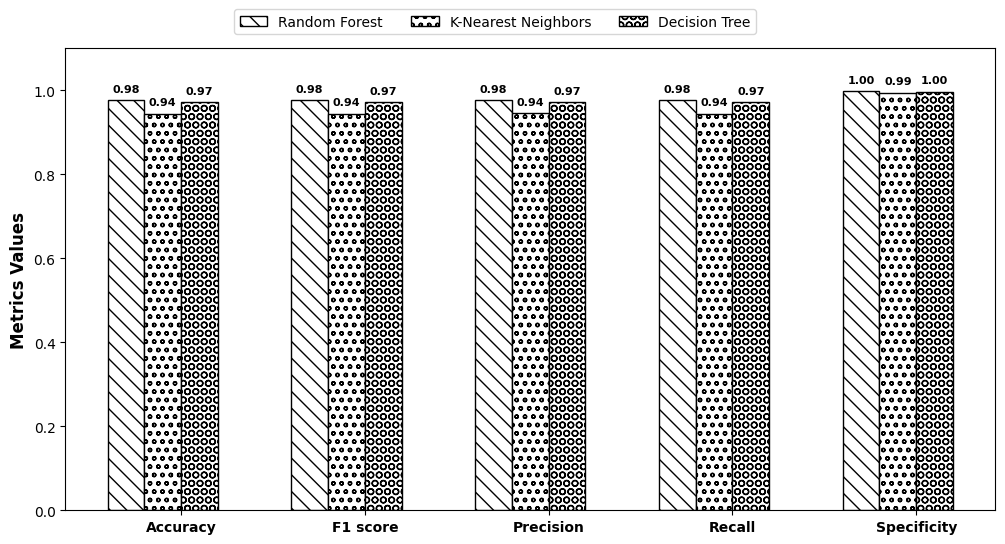

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

N = 5
ind = np.arange(N)
width = 0.2

# Define metrics for each model
rf = [accuracy_rf, score_rf, precision_rf, recall_rf, overall_specificity_rf]
kn = [accuracy_kn, score_kn, precision_kn, recall_kn, overall_specificity_kn]
dt = [accuracy_dt, score_dt, precision_dt, recall_dt, overall_specificity_dt]
# xb = [accuracy_xg, score_xg, precision_xg, recall_xg, overall_specificity_xg]

plt.figure(figsize=(12, 6))

bar1 = plt.bar(ind, rf, width, color='white', edgecolor='black', hatch='\\\\', label="Random Forest")
for i in range(N):
    plt.text(i, rf[i] + 0.02, f'{rf[i]:.2f}', ha='center', weight='bold', fontsize=8)

bar2 = plt.bar(ind + width, kn, width, color='white', edgecolor='black', hatch='oo', label="K-Nearest Neighbors")
for i in range(N):
    plt.text(i + width, kn[i] + 0.02, f'{kn[i]:.2f}', ha='center', weight='bold', fontsize=8)

bar3 = plt.bar(ind + width * 2, dt, width, color='white', edgecolor='black', hatch='OO', label="Decision Tree")
for i in range(N):
    plt.text(i + width * 2, dt[i] + 0.02, f'{dt[i]:.2f}', ha='center', weight='bold', fontsize=8)

# bar4 = plt.bar(ind + width * 3, xb, width, color='white', edgecolor='black', hatch='xx', label="XGBoost")
# for i in range(N):
#     plt.text(i + width * 3, xb[i] + 0.02, f'{xb[i]:.2f}', ha='center', weight='bold', fontsize=8)

plt.ylabel('Metrics Values', weight='bold', fontsize=12)
plt.xticks(ind + width * 1.5, ['Accuracy', 'F1 score', 'Precision', 'Recall', 'Specificity'], weight='bold', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(bbox_to_anchor=(0.75, 1.1), ncol=4)
plt.ylim(0, 1.1)

plt.show()

